In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

In [5]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_4 = np.loadtxt('class4_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_4_val = np.loadtxt('class4_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')
X_4_test = np.loadtxt('class4_test.txt')
X_train = np.concatenate((X_1, X_2, X_3, X_4))
y_train = np.zeros((X_train.shape[0]))
y_train[0:X_1.shape[0]] = 0
y_train[X_1.shape[0]:X_1.shape[0]+X_2.shape[0]] = 1
y_train[X_1.shape[0]+X_2.shape[0]:X_1.shape[0]+X_2.shape[0]+X_3.shape[0]] = 2
y_train[X_1.shape[0]+X_2.shape[0]+X_3.shape[0]:] = 3

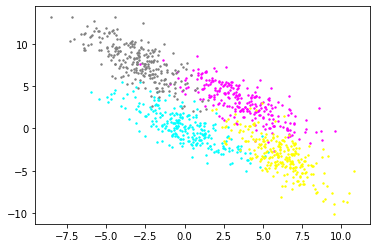

In [7]:
# simply visualising data
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
plt.scatter(X_4[:, 0], X_4[:, 1], color = 'grey', s = 2)

In [31]:
# svm classifier
clf = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((4, 4))
X = [X_1_test, X_2_test, X_3_test, X_4_test]
for i in range(4):
    for x in X[i]:
        x = x.reshape(1, -1)
        ConfusionMatrix[int(clf.predict(x)), i] = ConfusionMatrix[int(clf.predict(x)), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'],['True 1', 'True 2', 'True 3', 'True 4'])

,True 1,True 2,True 3,True 4
Predicted 1,92.0,0.0,5.0,3.0
Predicted 2,0.0,90.0,4.0,1.0
Predicted 3,4.0,6.0,91.0,0.0
Predicted 4,4.0,4.0,0.0,96.0


In [33]:
# performance measures
N = np.sum(ConfusionMatrix, axis = 0)
TP = np.diagonal(ConfusionMatrix)
TN = np.sum(TP)-TP
FP = np.sum(ConfusionMatrix, axis = 1)-TP
FN = np.sum(ConfusionMatrix, axis = 0)-TP
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy.tolist(),
    'Mean Accuracy': np.mean(Accuracy)
})
print({
    'Precision: ': Precision.tolist(),
    'Mean Precision': np.mean(Precision)
})
print({
    'Recall: ': Recall.tolist(),
    'Mean Recall': np.mean(Recall)
})
print({
    'F_measure: ': F_measure.tolist(),
    'Mean F_measure': np.mean(F_measure)
})

{'Accuracy: ': [92.0, 90.0, 91.0, 96.0], 'Mean Accuracy': 92.25}
{'Precision: ': [0.92, 0.9473684210526315, 0.900990099009901, 0.9230769230769231], 'Mean Precision': 0.922858860784864}
{'Recall: ': [0.92, 0.9, 0.91, 0.96], 'Mean Recall': 0.9225}
{'F_measure: ': [0.92, 0.9230769230769231, 0.9054726368159204, 0.9411764705882353], 'Mean F_measure': 0.9224315076202698}


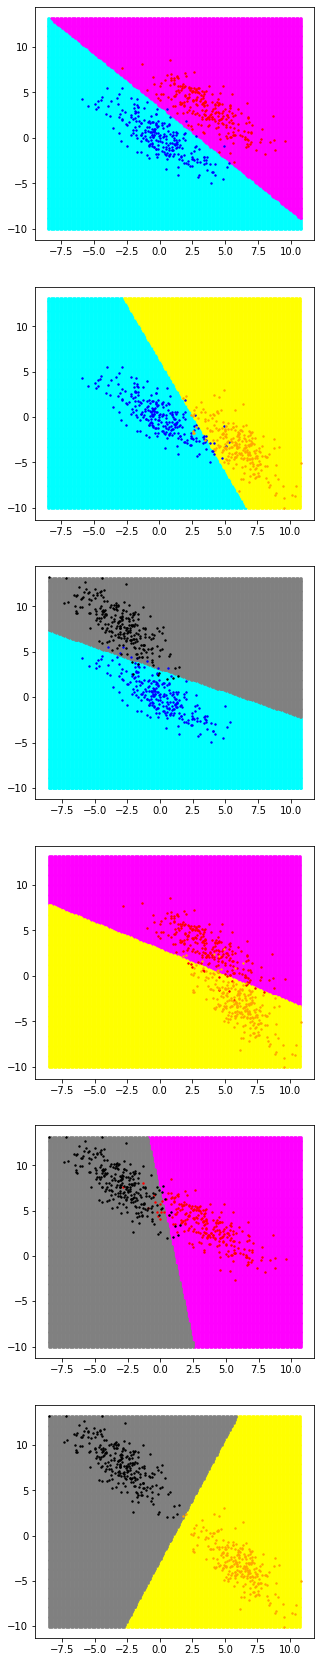

In [34]:
# decision region plot for every pair of classes with the respective training data superimposed
plt.rcParams['figure.figsize'] = [5, 30]
fig, axs = plt.subplots(6, 1)
x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0]), min(X_4[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1]), max(X_4[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0]), min(X_4[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1]), max(X_4[:, 1])])

# class 1 v class 2
x_1 = []
x_2 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.decision_function([[x, y]])[0][0] < 0
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
axs[0].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[0].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[0].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[0].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)

# class 1 v class 3
x_1 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.decision_function([[x, y]])[0][1] < 0
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_3.append([x, y])
x_1 = np.array(x_1)
x_3 = np.array(x_3)
axs[1].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[1].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[1].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[1].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)

# class 1 v class 4
x_1 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.decision_function([[x, y]])[0][2] < 0
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_1 = np.array(x_1)
x_4 = np.array(x_4)
axs[2].scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
axs[2].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[2].scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
axs[2].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)

# class 2 v class 3
x_2 = []
x_3 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.decision_function([[x, y]])[0][3] < 0
        if c == 0:
            x_2.append([x, y])
        elif c == 1:
            x_3.append([x, y])
x_2 = np.array(x_2)
x_3 = np.array(x_3)
axs[3].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[3].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[3].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
axs[3].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)

# class 2 v class 4
x_2 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.decision_function([[x, y]])[0][4] < 0
        if c == 0:
            x_2.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_2 = np.array(x_2)
x_4 = np.array(x_4)
axs[4].scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
axs[4].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[4].scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
axs[4].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)

# class 2 v class 4
x_3 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.decision_function([[x, y]])[0][5] < 0
        if c == 0:
            x_3.append([x, y])
        elif c == 1:
            x_4.append([x, y])
x_3 = np.array(x_3)
x_4 = np.array(x_4)
axs[5].scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
axs[5].scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 2)
axs[5].scatter(X_3[:, 0], X_3[:, 1], color = 'orange', s = 2)
axs[5].scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)


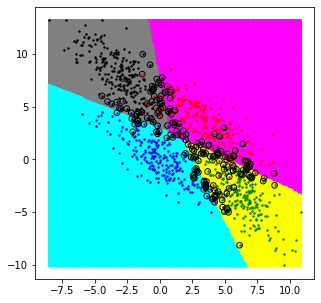

In [35]:
# Decision region plot for all the classes together with the training data superposed
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
x_3 = []
x_4 = []
for x in np.arange(x_min, x_max, 0.1):
    for y in np.arange(y_min, y_max, 0.1):
        c = clf.predict([[x, y]])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
        elif c == 2:
            x_3.append([x, y])
        else:
            x_4.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 4)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 4)
plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 4)
plt.scatter(x_4[:, 0], x_4[:, 1], color = 'grey', s = 4)
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
plt.scatter(X_4[:, 0], X_4[:, 1], color = 'black', s = 2)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none', edgecolors='black', s = 32)